In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
#import for stock data visaulization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#import for reading from yahoo fin
from pandas_datareader import data
from datetime import datetime

In [4]:
#define stocks to be used for data analysis
stock_list = ['AAPL', 'AMZN', 'MSFT', 'GOOG']
#start and end date for fetching data
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
for stock_symbol in stock_list:
    globals() [stock_symbol] = data.DataReader(stock_symbol, 'yahoo', start , end)

In [5]:
stock_list = ['AAPL', 'AMZN', 'MSFT', 'GOOG']
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)
stocksData = []
for stock_symbol in stock_list:
    stockData = data.DataReader(stock_symbol, 'yahoo', start , end)
    stocksData.append(stockData)

In [6]:
stocksData[0].describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,193.240715,189.324722,191.242341,191.346627,3.260617e+07,189.749431
std,21.658346,21.394914,21.491695,21.514992,1.394612e+07,21.052664
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.039642
25%,175.967499,173.747501,174.872501,174.832497,2.323650e+07,174.111996
50%,191.894997,189.135002,190.165001,190.489998,2.970625e+07,188.313492
75%,210.074997,206.832497,208.305000,208.872498,3.876472e+07,206.713852
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [7]:
#view summary stocks of Apple
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,193.240715,189.324722,191.242341,191.346627,3.260617e+07,189.749431
std,21.658346,21.394914,21.491695,21.514992,1.394612e+07,21.052664
min,145.720001,142.000000,143.979996,142.190002,1.251390e+07,141.039642
25%,175.967499,173.747501,174.872501,174.832497,2.323650e+07,174.111996
50%,191.894997,189.135002,190.165001,190.489998,2.970625e+07,188.313492
75%,210.074997,206.832497,208.305000,208.872498,3.876472e+07,206.713852
max,233.470001,229.779999,230.779999,232.070007,9.624670e+07,229.392090


In [8]:
GOOG.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,1149.251660,1126.198299,1137.877797,1138.052457,1.608643e+06,1138.052457
std,64.715932,69.481521,67.350559,67.905039,7.162111e+05,67.905039
min,1003.539978,970.109985,973.900024,976.219971,6.790000e+05,976.219971
25%,1093.817505,1068.087524,1080.082489,1080.822479,1.199200e+06,1080.822479
50%,1152.147522,1131.066467,1143.750000,1142.809998,1.433550e+06,1142.809998
75%,1200.000000,1183.397461,1191.902496,1193.229950,1.849000e+06,1193.229950
max,1289.270020,1266.295044,1274.000000,1287.579956,6.207000e+06,1287.579956


In [9]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2018-06-14 to 2019-06-14
Data columns (total 6 columns):
High         252 non-null float64
Low          252 non-null float64
Open         252 non-null float64
Close        252 non-null float64
Volume       252 non-null float64
Adj Close    252 non-null float64
dtypes: float64(6)
memory usage: 13.8 KB


In [10]:
import pandas as pd
#create a pandas DataFrame for AAPL stock
AAPL_ds = pd.DataFrame(AAPL['Adj Close'])

In [11]:
AAPL_ds.shape

(252, 1)

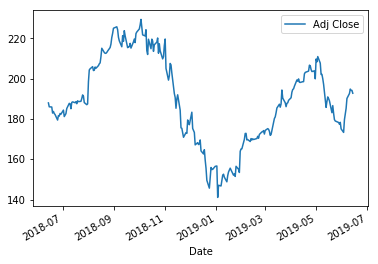

In [12]:
AAPL_ds.plot()

In [13]:
GOOG_ds = pd.DataFrame(GOOG['Adj Close'])

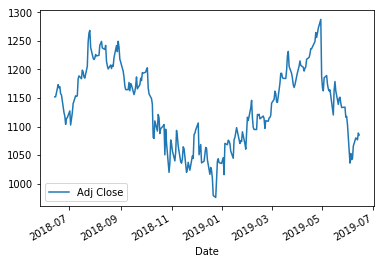

In [14]:
GOOG_ds.plot()

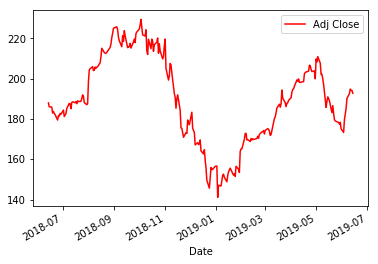

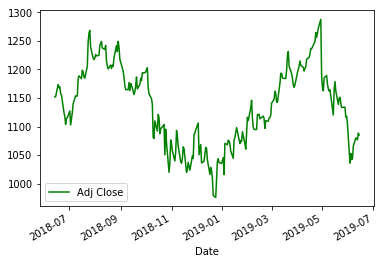

In [15]:
AAPL_ds.plot(color ='r')
GOOG_ds.plot(color ='g')

In [16]:
aapl_arr = AAPL_ds.iloc[:,0].values

In [17]:
aapl_arr.shape

(252,)

In [18]:
aapl_arr[0]

187.93919372558594

In [19]:
import numpy as np
def next_batch(batch_size,num_steps):
    x_batch = np.zeros((batch_size,num_steps))
    y_batch = np.zeros((batch_size,num_steps))
    
    for i in range(batch_size):
        stindex = np.random.randint(0,251-num_steps-1)
        #print(stindex)
        endindex = stindex + num_steps
        x_batch[i] = aapl_arr[stindex: stindex + num_steps]
        y_batch[i] = aapl_arr[stindex+1: stindex+num_steps+1]
    return x_batch, y_batch


In [20]:
x_batch, y_batch  = next_batch(10,20)

In [21]:
x_batch.shape, y_batch.shape

((10, 20), (10, 20))

In [22]:
x_batch[1]

array([218.24223328, 219.62609863, 217.87651062, 222.35424805,
       223.13514709, 224.63760376, 226.6342926 , 229.39208984,
       225.35917664, 221.70185852, 221.18786621, 224.25209045,
       213.8633728 , 211.97541809, 219.54702759, 214.8518219 ,
       219.58654785, 218.63764954, 213.52729797, 216.77932739])

In [23]:
y_batch[1]

array([219.62609863, 217.87651062, 222.35424805, 223.13514709,
       224.63760376, 226.6342926 , 229.39208984, 225.35917664,
       221.70185852, 221.18786621, 224.25209045, 213.8633728 ,
       211.97541809, 219.54702759, 214.8518219 , 219.58654785,
       218.63764954, 213.52729797, 216.77932739, 218.10385132])

In [24]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "rnn"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [25]:
import tensorflow as tf
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)
reset_graph()

n_steps = 30
n_inputs = 1
n_neurons = 150
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [26]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
    tf.contrib.rnn.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.


In [27]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.


In [28]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y)) # MSE
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [29]:
saver = tf.train.Saver()
n_iterations = 1000
batch_size = 15

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        X_batch = X_batch.reshape(batch_size,n_steps,1)
        y_batch = y_batch.reshape(batch_size,n_steps,1)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    saver.save(sess, "./my_stock_series_model") # not shown in the content

0 	MSE: 25123.555
100 	MSE: 411.71548
200 	MSE: 50.71217
300 	MSE: 14.541627
400 	MSE: 15.912584
500 	MSE: 14.737147
600 	MSE: 14.765714
700 	MSE: 12.47342
800 	MSE: 15.44414
900 	MSE: 17.72422


In [30]:
with tf.Session() as sess:                          # not shown in the content
    saver.restore(sess, "./my_stock_series_model")   # not shown

    X_new = aapl_arr[100:130]
    X_new = X_new.reshape(1,30,1)
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    y_true= aapl_arr[101:131]
    print(y_pred)

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./my_stock_series_model
[[[199.5701 ]
  [201.3472 ]
  [205.78706]
  [207.9634 ]
  [204.09998]
  [196.35678]
  [194.00868]
  [189.4021 ]
  [190.68938]
  [191.98946]
  [187.43744]
  [179.96613]
  [177.54106]
  [173.6538 ]
  [174.14397]
  [173.60394]
  [177.75897]
  [178.14369]
  [178.04716]
  [182.01614]
  [178.0887 ]
  [175.87004]
  [170.86742]
  [169.87141]
  [168.72763]
  [168.66107]
  [169.60957]
  [166.36728]
  [164.45145]
  [165.14911]]]


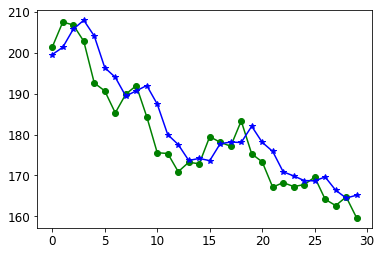

In [31]:
plt.plot(y_true, marker="o", color="green")
plt.plot(y_pred.ravel(), marker="*", color="blue")

In [32]:
#View First 5 records
AAPL_ds.head()

,Adj Close
Date,
2018-06-14,187.939194
2018-06-15,186.008575
2018-06-18,185.910080
2018-06-19,182.905807
2018-06-20,183.703659


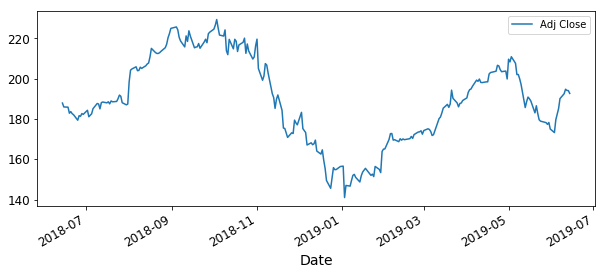

In [33]:
AAPL_ds.plot(legend=True, figsize=(10,4))

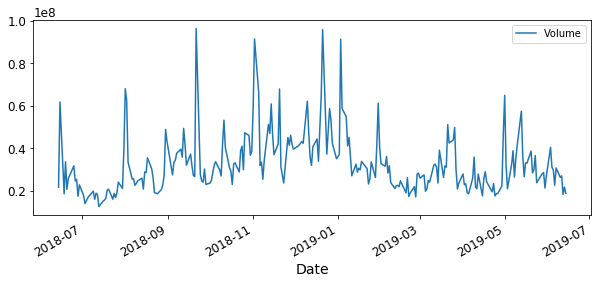

In [34]:
#view volume of stock traded every day
AAPL['Volume'].plot(legend=True, figsize=(10,4))

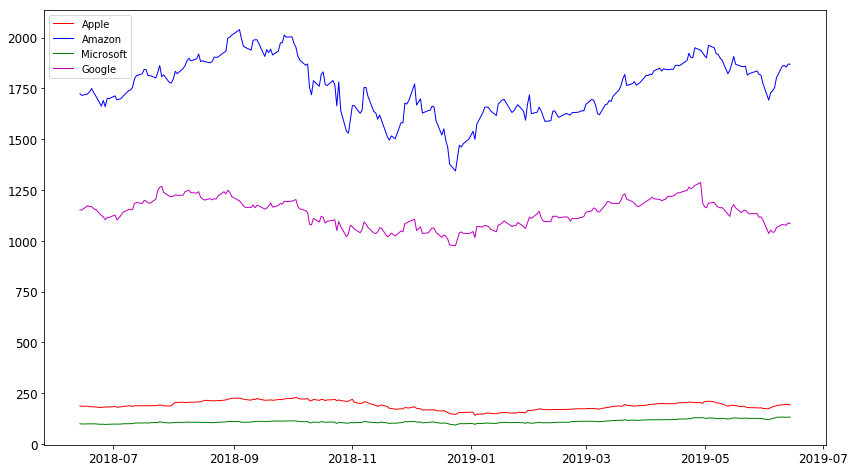

In [35]:
#plot all stock performances  on Adj close for entire year
plt.figure(figsize=(14,8))
plt.plot(AAPL['Adj Close'], 'r', label='Apple', linewidth=1)
plt.plot(AMZN['Adj Close'], 'b', label='Amazon', linewidth=1)
plt.plot(MSFT['Adj Close'], 'g', label='Microsoft', linewidth=1)
plt.plot(GOOG['Adj Close'], 'm', label='Google', linewidth=1)
plt.legend()
plt.show()

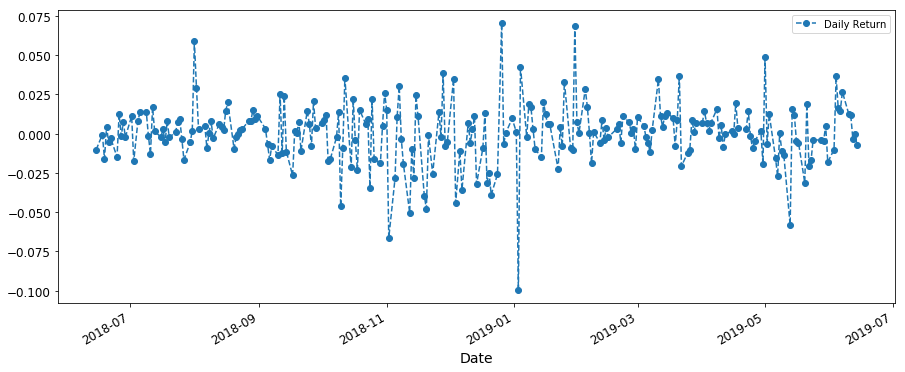

In [36]:
#computing pc chnage
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()
AAPL['Daily Return'].plot(figsize=(15,6), legend=True, linestyle='--', marker='o')

In [37]:
#Fetch closing prices
closing_price_stock = data.DataReader(['AAPL', 'AMZN', 'MSFT', 'GOOG'], 'yahoo', start , end)['Adj Close']

In [38]:
closing_price_stock.head()

Symbols,AAPL,AMZN,GOOG,MSFT
Date,,,,
2018-06-14,187.939194,1723.859985,1152.119995,99.799400
2018-06-15,186.008575,1715.969971,1152.260010,98.530022
2018-06-18,185.910080,1723.790039,1173.459961,99.248360
2018-06-19,182.905807,1734.780029,1168.060059,99.248360
2018-06-20,183.703659,1750.079956,1169.839966,100.242218


In [39]:
stock_returns = closing_price_stock.pct_change()

C:\Users\Digesh\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


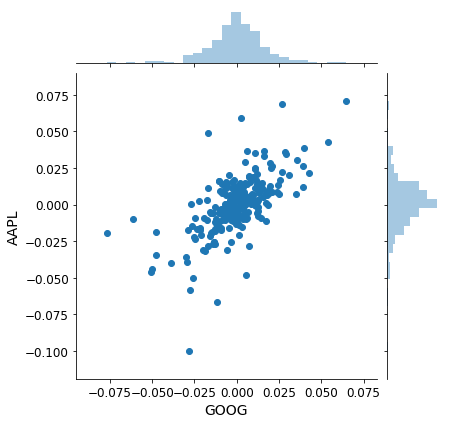

In [40]:
#compare daily returns of Google and Apple
sns.jointplot('GOOG', 'AAPL', stock_returns,kind='scatter')

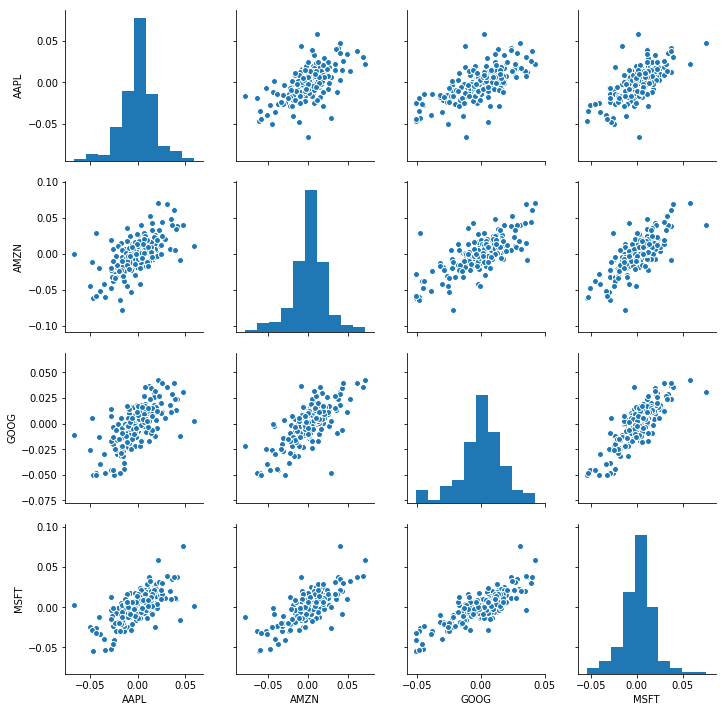

In [29]:
sns.pairplot(stock_returns.dropna())